#### Import libs

In [3]:
import pandas as pd
import os

#### Merge 12 month of data into a single fileyear_2019_data

In [4]:
files = os.listdir('./Sales_Data')

sales_data = pd.DataFrame()

for file in files:
    df = pd.read_csv('Sales_Data/'+file)
    sales_data = pd.concat([sales_data, df])
sales_data.to_csv("sales_data.csv",index=False)

#### Read the final file

In [5]:
sales_df = pd.read_csv('sales_data.csv')
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"


## Task 1 : 
#### The best month for sales with earnings

### Clean up data

#### Drop NaN rows

In [6]:
sales_df = sales_df.dropna(how='any')
sales_df[sales_df.isna().any(axis=1)] # must show empty df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


#### Drop rows with invalid data

In [7]:
sales_df = sales_df[sales_df['Product'].str[0:7] != 'Product']

#### Add some columns

In [8]:
#add a month columns
months = sales_df['Order Date'].str[0:2]
sales_df['Month'] = months.astype('int32')
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6


In [9]:
#add a sales columns
#convert str to numeric
sales_df['Quantity Ordered'] =  pd.to_numeric(sales_df['Quantity Ordered'])
sales_df['Price Each'] = pd.to_numeric(sales_df['Price Each'])

sales = sales_df['Quantity Ordered'] * sales_df['Price Each']
sales_df['Sales'] = sales
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",6,11.95
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",6,1700.00
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",6,999.99
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",6,149.99
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",6,99.99


#### Answering Task 1 :

In [10]:
data = sales_df.groupby('Month').sum()
max_sales = data['Sales'].idxmax()
print(max_sales)

12


/tmp/ipykernel_8393/2002502161.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = sales_df.groupby('Month').sum()


Text(0, 0.5, 'Sales in $')

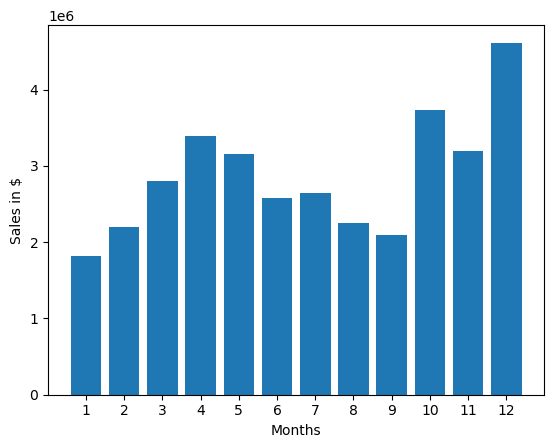

In [11]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, data['Sales'])
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales in $')

## Task 2 :
#### City with the highest number of sales

/tmp/ipykernel_8393/405593793.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data2 = sales_df.groupby('City').sum()


 San Francisco


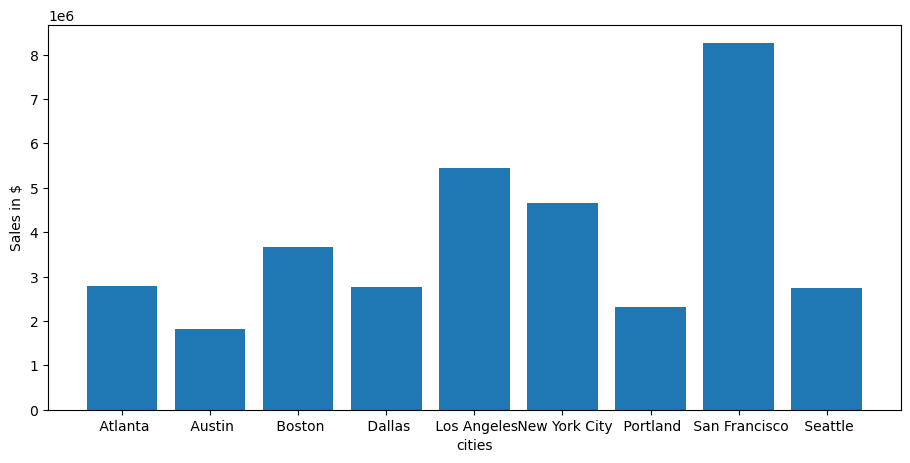

In [69]:
#add a city column
sales_df['City'] = sales_df['Purchase Address'].str.split(',').str[1]
#Calculate
data2 = sales_df.groupby('City').sum()
#get the city with max sales
max_sales = data2['Sales'].idxmax()
print(max_sales)
#plotting
cities = data2.index.tolist()

plt.figure(figsize=(11,5))
plt.bar(cities, data2['Sales'])
plt.xticks(cities)
plt.xlabel('cities')
plt.ylabel('Sales in $')
plt.show()

## Task 3 :
#### What time should adverts be displayed to miximize sales

In [71]:
#convert str to date : 
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date'])
sales_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Time
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.95,Portland,19:34
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.00,San Francisco,10:05
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.99,Los Angeles,20:18
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.99,Seattle,10:21
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.99,San Francisco,18:58
...,...,...,...,...,...,...,...,...,...,...
186845,162004,Apple Airpods Headphones,1,150.00,2019-02-12 22:02:00,"227 Church St, San Francisco, CA 94016",2,150.00,San Francisco,22:02
186846,162005,AAA Batteries (4-pack),2,2.99,2019-02-04 20:44:00,"417 Jefferson St, Los Angeles, CA 90001",2,5.98,Los Angeles,20:44
186847,162006,USB-C Charging Cable,1,11.95,2019-02-24 06:31:00,"498 8th St, Atlanta, GA 30301",2,11.95,Atlanta,06:31
186848,162007,USB-C Charging Cable,1,11.95,2019-02-24 19:09:00,"715 7th St, Dallas, TX 75001",2,11.95,Dallas,19:09


In [72]:
#add an hour column
sales_df['Hour'] = sales_df['Order Date'].dt.hour
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Order Time,Hour
0,209921,USB-C Charging Cable,1,11.95,2019-06-23 19:34:00,"950 Walnut St, Portland, ME 04101",6,11.95,Portland,19:34,19
1,209922,Macbook Pro Laptop,1,1700.00,2019-06-30 10:05:00,"80 4th St, San Francisco, CA 94016",6,1700.00,San Francisco,10:05,10
2,209923,ThinkPad Laptop,1,999.99,2019-06-24 20:18:00,"402 Jackson St, Los Angeles, CA 90001",6,999.99,Los Angeles,20:18,20
3,209924,27in FHD Monitor,1,149.99,2019-06-05 10:21:00,"560 10th St, Seattle, WA 98101",6,149.99,Seattle,10:21,10
4,209925,Bose SoundSport Headphones,1,99.99,2019-06-25 18:58:00,"545 2nd St, San Francisco, CA 94016",6,99.99,San Francisco,18:58,18


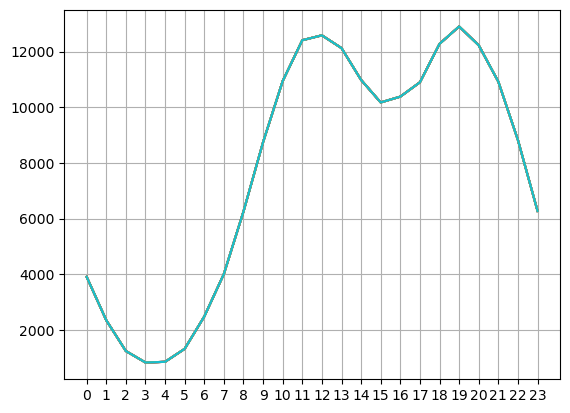

In [109]:
hours = [hour for hour, df in sales_df.groupby('Hour')]
plt.plot(hours,sales_df.groupby('Hour').count())
plt.xticks(hours)
plt.grid()
plt.show()

## Task 4 : 
#### Products often sold together

In [139]:
df = sales_df[sales_df['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID','Grouped']].drop_duplicates()
df.head(10)

/tmp/ipykernel_8393/3610760900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
17,209938,"iPhone,Wired Headphones"
29,209949,"Google Phone,USB-C Charging Cable"
41,209960,"USB-C Charging Cable,AA Batteries (4-pack)"
43,209961,"iPhone,Lightning Charging Cable"
147,210064,"Lightning Charging Cable,27in FHD Monitor"
229,210144,"27in 4K Gaming Monitor,AA Batteries (4-pack)"
234,210148,"20in Monitor,Wired Headphones"
294,210207,"Google Phone,USB-C Charging Cable"
342,210253,"Google Phone,USB-C Charging Cable"
361,210271,"Vareebadd Phone,USB-C Charging Cable"


In [142]:
# calculate combinations
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
for key, value in count.most_common(10) : 
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


## Task 5 : 

/tmp/ipykernel_8393/2269380685.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quantity = products_df.sum()['Quantity Ordered']


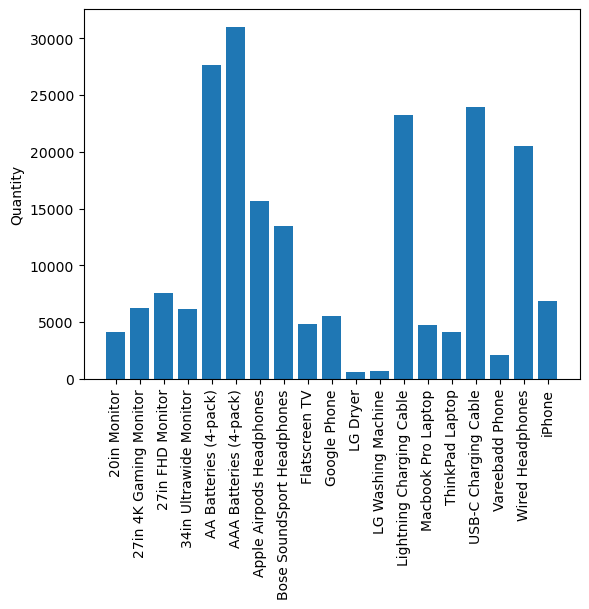

In [150]:
products_df = sales_df.groupby('Product')
quantity = products_df.sum()['Quantity Ordered']

products = [product for product, df in products_df]
plt.bar(products, quantity)
plt.xticks(products, rotation='vertical')
plt.ylabel('Quantity')
plt.show()

/tmp/ipykernel_8393/394629410.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = sales_df.groupby('Product').mean()['Price Each']
/tmp/ipykernel_8393/394629410.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  ax2.plot(products, prices,'b-',color='g')
/tmp/ipykernel_8393/394629410.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


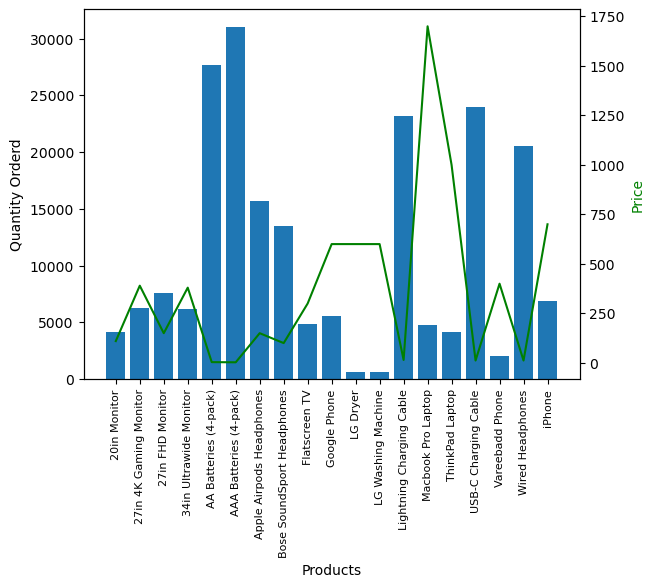

In [156]:
prices = sales_df.groupby('Product').mean()['Price Each']
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity)
ax2.plot(products, prices,'b-',color='g')
ax1.set_xlabel('Products')
ax1.set_ylabel('Quantity Orderd')
ax2.set_ylabel('Price',color='g')
ax1.set_xticklabels(products, rotation='vertical', size=8)
plt.show()